**In image processing, We have two types of filters: Linear Filters and Non-linear Filters.**

**1. Linear Filters:** means the output value of a pixel is calculated by combining (adding/multiplying) the values of the surrounding pixels in a predictable, fixed way.

**Examples:**

**Low-pass filters:** Reduce high-frequency details (like noise and edges) and keep smooth areas.
  
**Examples:**

*   Gaussian Filter
*   Average(Mean) Filter.

**High-pass filters:** Enhance high-frequency details (like edges and fine structures).

**Examples:**  

*   Laplacian Filter.
*   Unsharp Filter


**2. Non-linear Filters:** means the output pixel value is calculated using a rule or operation.

**Examples:**

*   Median Filter: Removes noise by replacing each pixel with the median of its neighbors.


----------------------------------------------------------

**1.Mean (Average) Filter :**  is a low-pass filter used to smooth images by averaging the pixel values in a neighborhood around each pixel.


*   **cv2.blur(image, filter_size)** applies the Mean filter.
*   **filter_size:** The size of the window used for averaging.
*   **A larger kernel results in more smoothing.**


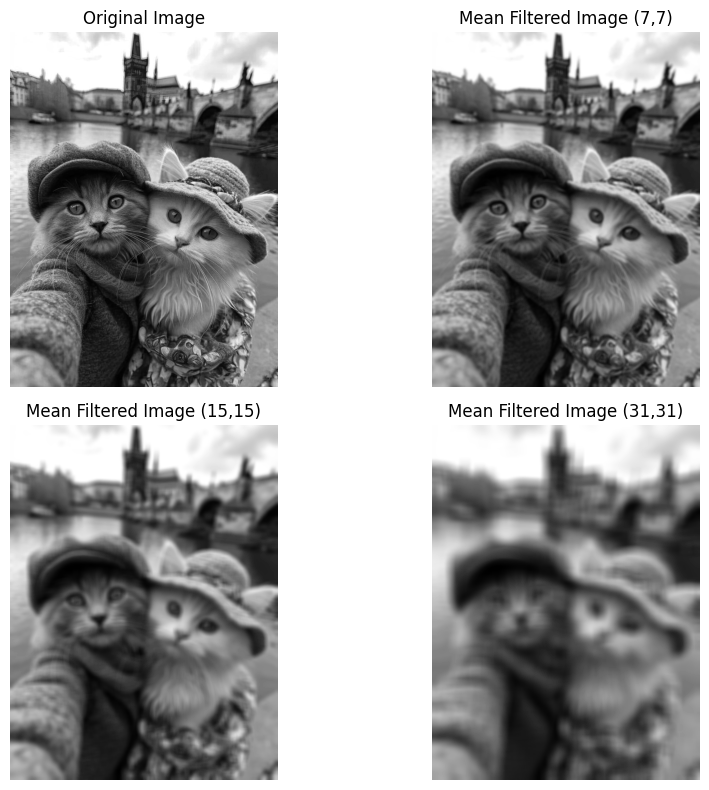

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/cute.jpg', 0)

# Apply the Mean filter
# The mask size determines the neighborhood size
mask_size1 = (7, 7)  # 5x5 kernel
mask_size2 = (15, 15)  # 15x15 kernel
mask_size3 = (31, 31)  # 31x31 kernel
mean_filtered_image1 = cv2.blur(image, mask_size1)
mean_filtered_image2 = cv2.blur(image, mask_size2)
mean_filtered_image3 = cv2.blur(image, mask_size3)
# Display the original and filtered images
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Mean Filtered Image (7,7)")
plt.imshow(mean_filtered_image1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Mean Filtered Image (15,15)")
plt.imshow(mean_filtered_image2, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Mean Filtered Image (31,31)")
plt.imshow(mean_filtered_image3, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**Many variations on the basic neighborhood averaging filter:**

**1.1 Directional Averaging:** A rectangular kernel is used to apply blurring in a specific direction only (e.g., horizontal blurring).

*   Can be implemented using **cv2.blur()** by specifying the size of the rectangular kernel.


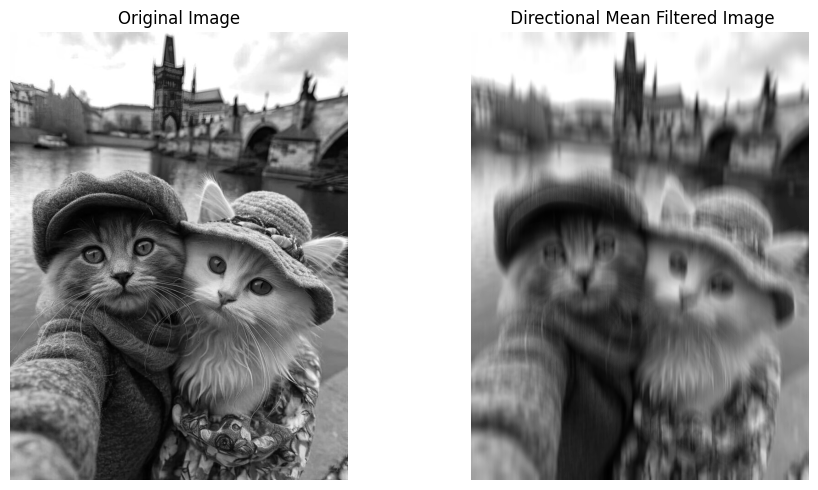

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/cute.jpg', 0)

mask_size = (1, 31)
#the blurring is applied only in the horizontal direction due to the rectangular kernel (1×31).
directional_filtered_image = cv2.blur(image, mask_size)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(" Directional Mean Filtered Image")
plt.imshow(directional_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**1.2 Selective Application :** applying a condition to choose between the original value and the filtered value based on the difference and a specified threshold.

*   Can be implemented using **cv2.blur()**
*   Set the **threshold value** to compare the difference between the original and filtered image , If the difference between the original and filtered image is smaller than the threshold, apply the filtered value **Otherwise**, keep the original value

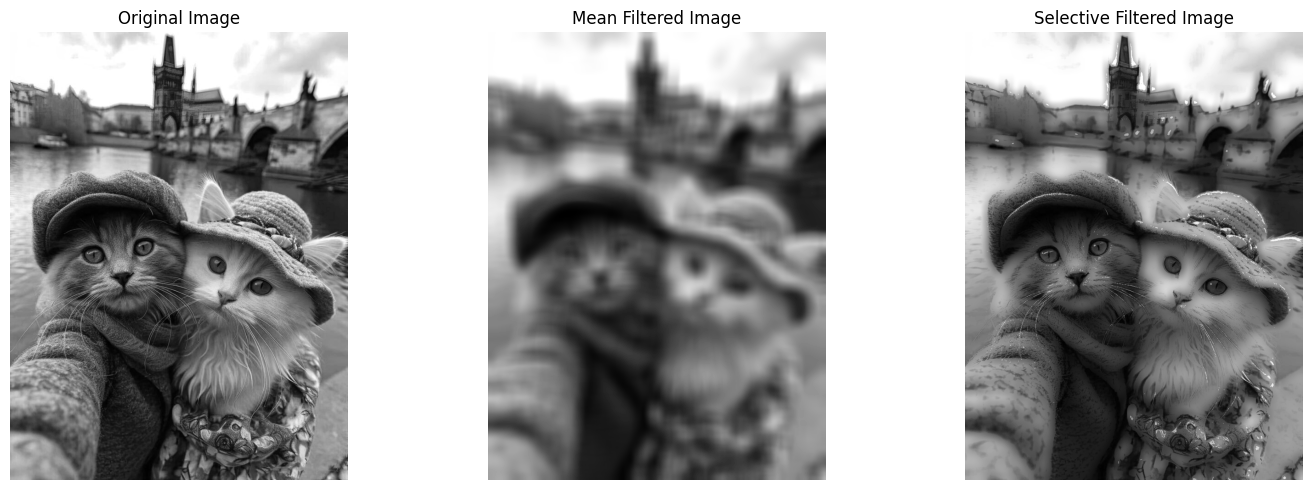

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('/content/cute.jpg', 0)

mask_size = (31, 31)
mean_filtered_image = cv2.blur(image, mask_size)

# Set the threshold for selective application
threshold = 70

# Apply the selective filtering based on the difference and threshold
selective_filtered_image = np.where(
    (image - mean_filtered_image) < threshold,

    mean_filtered_image,  # Apply the filtered image
        image,  # Apply the filtered image
  # Keep the original image
)

plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display the image after applying the mean filter
plt.subplot(1, 3, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')

# Display the selective filtered image
plt.subplot(1, 3, 3)
plt.imshow(selective_filtered_image, cmap='gray')
plt.title("Selective Filtered Image")
plt.axis('off')


plt.tight_layout()
plt.show()


**2. Gaussian Blur Filter :**  is a low-pass filter smooths an image by applying a Gaussian function. It helps reduce noise and details, and it is widely used in image processing.

*   **cv2.GaussianBlur(image, mask_size, sigma)** applies the Gaussian blur.
*   **mask_size:** The size of the window (e.g., (5, 5)). It must be an odd number.

*   **sigma:** The standard deviation of the Gaussian function. A value of 0 lets OpenCV calculate it based on the kernel size.







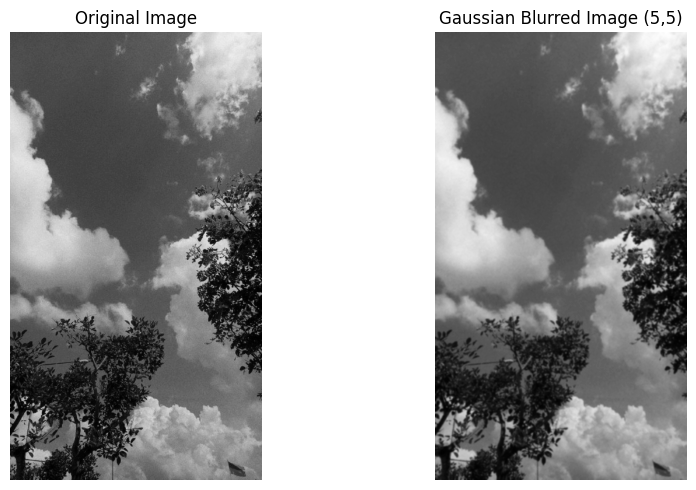

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/tree.jpg', 0)

# Apply the Gaussian Blur
# The kernel size determines the size of the Gaussian window
# You should always use an odd kernel size (e.g., 5x5, 7x7)
mask_size = (5, 5)  # 5x5 Gaussian kernel
sigma = 0            # Standard deviation (0 means it's automatically calculated based on kernel size)
gaussian_blurred_image = cv2.GaussianBlur(image, mask_size, sigma)

# Display the original and Gaussian blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Blurred Image (5,5)")
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**The Gaussian blur produces a more natural blurring effect than the averaging filter (mean)**

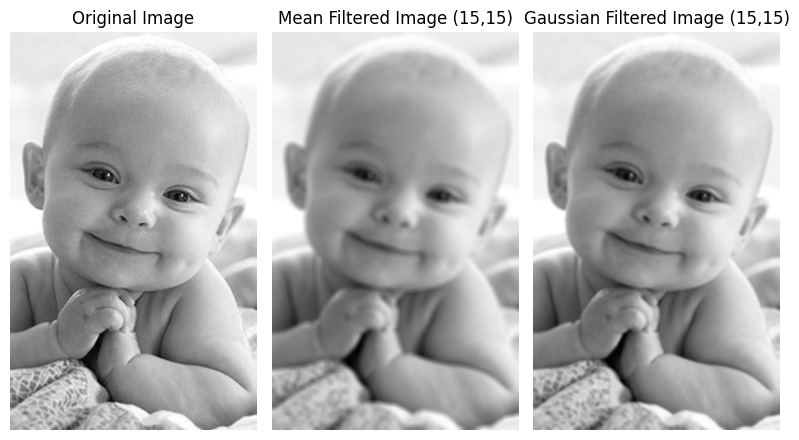

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/baby.jpg', 0)

# The mask size determines the neighborhood size
mask_size = (15, 15)

mean_filtered_image = cv2.blur(image, mask_size)

gaussian_blurred_image = cv2.GaussianBlur(image, mask_size, 0)
# Display the original and filtered images
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Mean Filtered Image (15,15)")
plt.imshow(mean_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gaussian Filtered Image (15,15)")
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.axis('off')



plt.tight_layout()
plt.show()


**3. The Laplacian Filter :** is a high-pass filter used to detect edges by calculating the second derivative of an image. It highlights regions of rapid intensity change, such as edges.

*   **cv2.Laplacian(image, -1, ksize)** applies **8-neighbours** Laplacian Filter

*   **ksize:** Kernel size (usually 1, 3, or 5). Must be an odd number.
*   A larger kernel size detects broader features but can miss finer details.

*   There is no built-in option to make cv2.Laplacian work with the 4-neighbors approach.

*   If you need **4-neighbors**, you must use **cv2.filter2D ()** with a custom kernel.


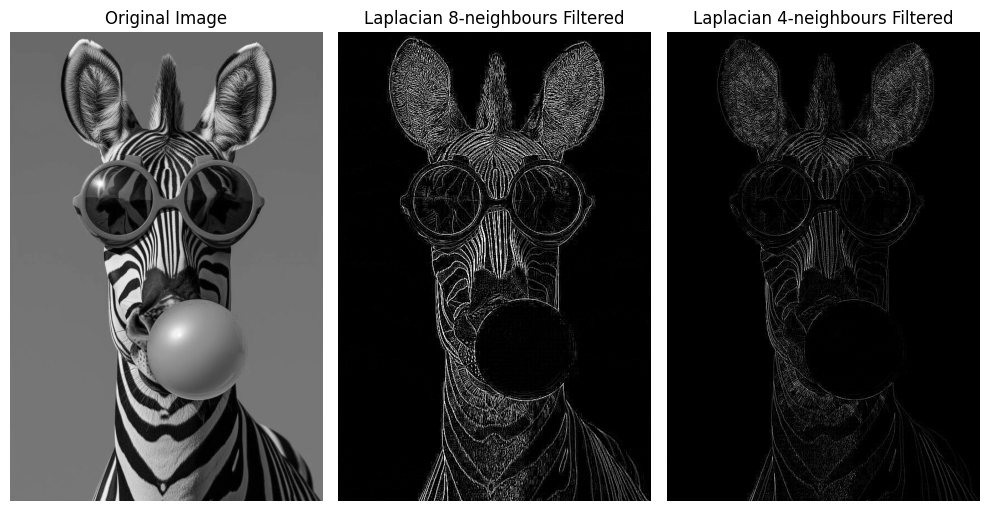

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/cool.jpg', 0)
mask_4 =np.array([[0, -1,  0],
                     [-1,  4, -1],
                     [0, -1,  0]])

# Apply the Laplacian 8-neighbours filter
laplacian_image_8 = cv2.Laplacian(image, -1, ksize=3)
# Apply the Laplacian 4-neighbours filter
laplacian_4 = cv2.filter2D(image, -1, mask_4)

# Display the original and Laplacian filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Laplacian 8-neighbours Filtered")
plt.imshow(laplacian_image_8, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Laplacian 4-neighbours Filtered")
plt.imshow(laplacian_4, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**3.1 Composite Laplacian Filter :** used to add the original image to the results of the Laplacian is to restore
the gray-level tonality that was lost in the Laplacian calculations.

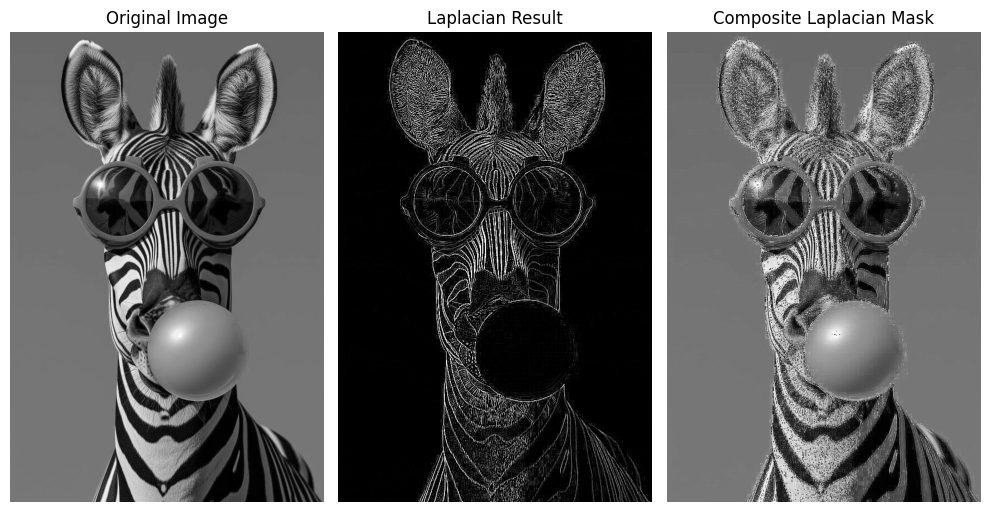

In [76]:
image = cv2.imread('/content/cool.jpg', 0)


# Apply the Laplacian 8-neighbours filter
laplacian = cv2.Laplacian(image, -1, ksize=3)

# Define the constant c Where c is a constant, c = 1 if the center coefficient is positive, while c = −1 if the same is negative.

c = 1

# Compute the Composite Laplacian Mask
composite_laplacian = (image + c * laplacian)

# Display the results
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Laplacian Result
plt.subplot(1, 3, 2)
plt.title("Laplacian Result")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

# Composite Laplacian Mask
plt.subplot(1, 3, 3)
plt.title("Composite Laplacian Mask")
plt.imshow(composite_laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

**4. Unsharp filter:** is a high-pass filter used to enhance the edges and details in an image by subtracting a blurred version of the image from the original and adding back the result. **It's often used to sharpen an image.**


*   Blur the Image
*   Create the Unsharp Mask
*  Use the formula:
Result
=𝛼⋅Original Image+𝛽⋅Blurred Image+𝛾

where:
𝛼: Weight for the original image.

𝛽: Weight for the blurred image (negative to subtract it).

𝛾 : Scalar added to each sum (used for brightness adjustment, set to 0 here).



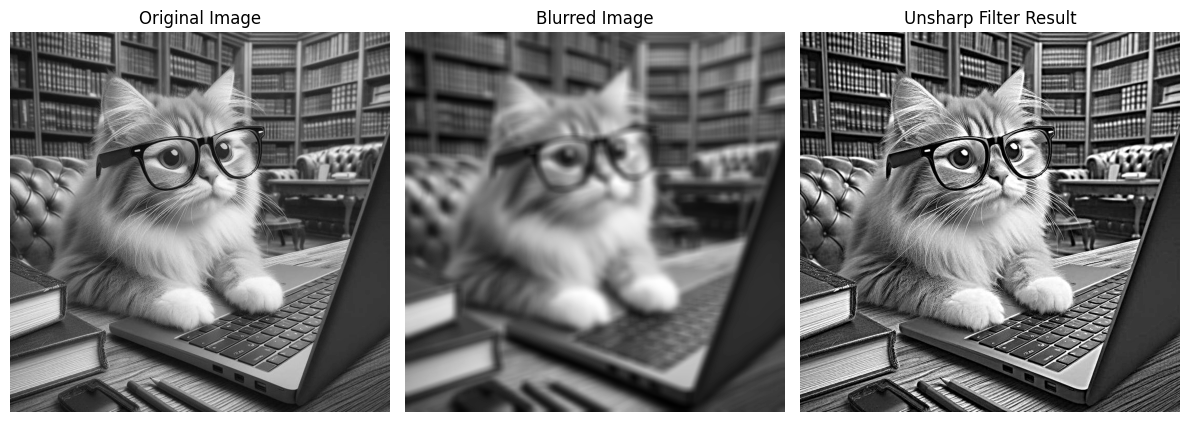

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/cat.jpg', 0)

# Apply Blur filter to create a blurred version of the image
blurred = cv2.blur(image, (15, 15))

# Create the Unsharp Mask
unsharp_mask = cv2.addWeighted(image, 2, blurred, -1, 0)

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Blurred Image
plt.subplot(1, 3, 2)
plt.title("Blurred Image")
plt.imshow(blurred, cmap='gray')
plt.axis('off')

# Unsharp Mask Result
plt.subplot(1, 3, 3)
plt.title("Unsharp Filter Result")
plt.imshow(unsharp_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**5. Median Filter :** is a non-linear filter commonly used to blur an image .


*   Use **cv2.medianBlur(image , size)** to apply the filter.
*   **size** (should be odd, e.g., 3, 5, 7, ...)



(-0.5, 734.5, 975.5, -0.5)

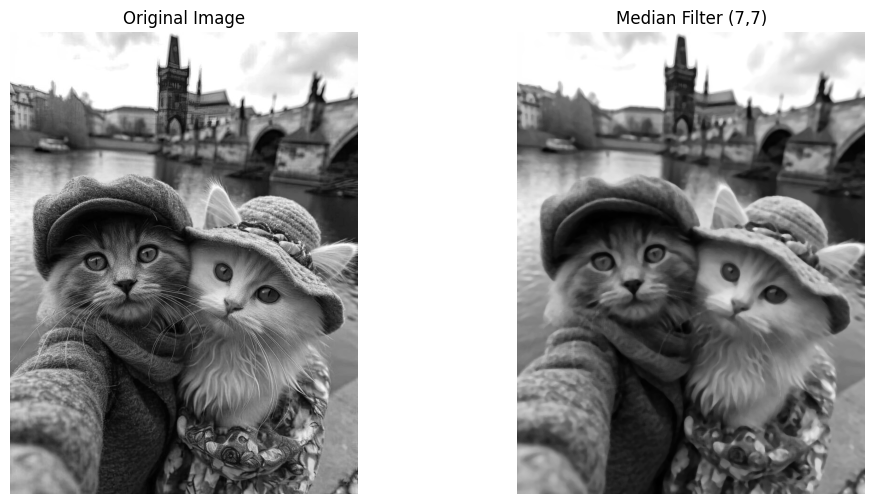

In [108]:
import cv2
import numpy as np

#Load the image
image = cv2.imread('/content/cute.jpg', 0)

# Apply the median filter

filtered_image = cv2.medianBlur(image, 7)

# Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Blurred Image
plt.subplot(1, 2, 2)
plt.title("Median Filter (7,7)")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
